In [1]:
import tkinter as tk
from tkinter import ttk
from tkinter import *
from tkcalendar import DateEntry
import yfinance as yf
import pandas as pd
import numpy as np 
import datetime
import matplotlib.pyplot as plt

In [2]:
def movingAverageCalc(asset, start, end, ma1, ma2):
    try:
        df = yf.download(asset, start=start, end=end)
        
    except:
        exception += "Make sure to input a valid ticker symbol./n Make sure Start date is before End Date./n"
    df["MA" + str(ma1)] = df['Adj Close'].rolling(window=ma1).mean()
    df["MA" + str(ma2)] = df['Adj Close'].rolling(window=ma2).mean()

    df['Signal'] = np.where(df["MA" + str(ma1)] > df["MA" + str(ma2)], 1, 0)
    df['Position'] = df['Signal'].diff()

    df.loc[(df['Position'] == 1), 'Buy'] = "Yes"
    df.loc[(df['Position'] == -1), 'Buy'] = "Sell"
    
    df = df.dropna()
    return df

In [8]:
def getSignals(df):
    Buying_dates = []
    Selling_dates = []

    for i in range(len(df)):
        if df["Buy"].iloc[i] == "Yes": 
            Buying_dates.append(df.iloc[i].name)
        elif df["Buy"].iloc[i] == "Sell":
            Selling_dates.append(df.iloc[i].name)
    return Buying_dates, Selling_dates

In [4]:
security = "TSLA"
startDate = "2019-01-01"
endDate = "2021-12-31"
ma1 = 12
ma2 = 20

In [11]:
data = movingAverageCalc(security, startDate, endDate, ma1, ma2)
buy, sell = getSignals(data)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MA12,MA20,Signal,Position,Buy
Date,,,,,,,,,,,
2019-02-13,20.823334,20.850000,20.371332,20.544666,20.544666,77124000,20.683611,20.633700,1,1.0,Yes
2019-02-22,19.632668,19.766666,19.473333,19.647333,19.647333,86109000,20.384111,20.407533,0,-1.0,Sell
2019-04-09,18.110001,18.333332,17.974001,18.153999,18.153999,88560000,18.425667,18.400267,1,1.0,Yes
2019-04-18,18.082001,18.322666,17.983334,18.217333,18.217333,88144500,18.202611,18.258533,0,-1.0,Sell
2019-06-14,14.083333,14.443333,14.026667,14.328000,14.328000,111501000,13.450333,13.333133,1,1.0,Yes
2019-08-05,15.306667,15.424667,15.052000,15.221333,15.221333,105424500,16.177334,16.262867,0,-1.0,Sell
2019-09-11,15.825333,16.544666,15.733333,16.473333,16.473333,150642000,15.050778,14.904700,1,1.0,Yes
2019-10-03,15.457333,15.632000,14.952000,15.535333,15.535333,226267500,15.945889,15.969367,0,-1.0,Sell
2019-10-11,16.476667,16.738667,16.454000,16.525999,16.525999,127131000,16.070945,16.014067,1,1.0,Yes


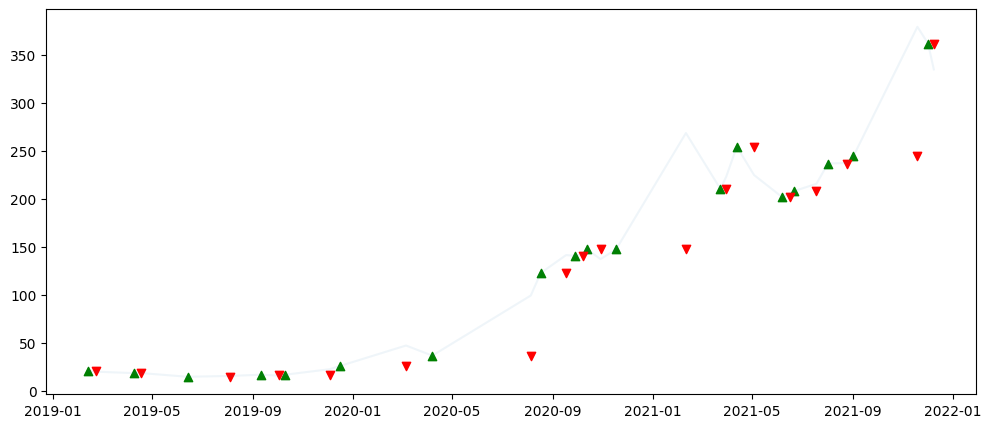

In [10]:
    plt.figure(figsize=(12,5))
    plt.scatter(data.loc[buy].index, data.loc[buy]['Adj Close'], marker = '^', c='g')
    plt.scatter(data.loc[sell].index, data.loc[buy]['Adj Close'], marker = 'v', c='r')
    plt.plot(data['Adj Close'], alpha=.07)